In [1]:
from IPython.display import Image
Image(url= "Uber_image.jpg")
import os


## 1. Collecting the data
___________________________________

In [2]:
import pandas as pd

# Use a raw string to avoid escape character issues
uber_dataset = pd.read_csv(r"E:\downloads\archive (1)\rideshare_kaggle.csv")

## 2. Exploratory data analysis
__________________________________________________



In [3]:
uber_dataset.head()

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,...,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1.543284e+09,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,...,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
2,981a3613-77af-4620-a42a-0c0866077d1e,1.543367e+09,1,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,...,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,1.543554e+09,4,30,11,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,...,0.0000,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,1.543463e+09,3,29,11,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,Lyft,...,0.0001,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800


In [4]:
del uber_dataset['cab_type']

In [5]:
uber_dataset.shape

(693071, 56)

In [6]:
uber_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693071 entries, 0 to 693070
Data columns (total 56 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           693071 non-null  object 
 1   timestamp                    693071 non-null  float64
 2   hour                         693071 non-null  int64  
 3   day                          693071 non-null  int64  
 4   month                        693071 non-null  int64  
 5   datetime                     693071 non-null  object 
 6   timezone                     693071 non-null  object 
 7   source                       693071 non-null  object 
 8   destination                  693071 non-null  object 
 9   product_id                   693071 non-null  object 
 10  name                         693071 non-null  object 
 11  price                        637976 non-null  float64
 12  distance                     693071 non-null  float64
 13 

In [7]:
uber_dataset.isnull().sum()

id                                 0
timestamp                          0
hour                               0
day                                0
month                              0
datetime                           0
timezone                           0
source                             0
destination                        0
product_id                         0
name                               0
price                          55095
distance                           0
surge_multiplier                   0
latitude                           0
longitude                          0
temperature                        0
apparentTemperature                0
short_summary                      0
long_summary                       0
precipIntensity                    0
precipProbability                  0
humidity                           0
windSpeed                          0
windGust                           0
windGustTime                       0
visibility                         0
t

In [8]:
uber_dataset.corr()

,timestamp,hour,day,month,price,distance,surge_multiplier,latitude,longitude,temperature,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
timestamp,1.000000,-0.028004,-0.341292,0.771182,0.000808,0.003553,0.000572,0.168130,-0.136802,-0.248748,...,-0.211700,0.999364,-0.306971,0.998194,-0.186328,0.999290,-0.378346,0.998286,-0.157748,0.999276
hour,-0.028004,1.000000,0.066090,-0.079379,0.000561,0.002280,-0.000077,0.019493,-0.006295,0.218769,...,0.019940,-0.027518,0.015513,-0.027027,0.002958,-0.027990,0.015820,-0.027704,0.002897,-0.027785
day,-0.341292,0.066090,1.000000,-0.861306,-0.000722,-0.000627,0.001389,0.006838,0.078690,-0.084116,...,0.145568,-0.341198,0.038076,-0.333990,-0.304870,-0.344532,-0.019940,-0.335043,-0.444445,-0.344411
month,0.771182,-0.079379,-0.861306,1.000000,0.000913,0.002298,-0.000628,0.085791,-0.126912,-0.081774,...,-0.213054,0.770767,-0.191803,0.765255,0.105326,0.772989,-0.191153,0.766031,0.215076,0.772896
price,0.000808,0.000561,-0.000722,0.000913,1.000000,0.345061,0.240458,0.002088,-0.001417,-0.000084,...,0.001114,0.000763,-0.000428,0.000769,-0.000550,0.000766,-0.000580,0.000814,-0.000290,0.000746
distance,0.003553,0.002280,-0.000627,0.002298,0.345061,1.000000,0.024769,0.000819,-0.000293,-0.002884,...,0.000648,0.003562,-0.003396,0.003428,-0.004191,0.003580,-0.003937,0.003526,-0.004238,0.003584
surge_multiplier,0.000572,-0.000077,0.001389,-0.000628,0.240458,0.024769,1.000000,0.001375,-0.001829,-0.001572,...,-0.000101,0.000544,-0.000724,0.000554,-0.001951,0.000522,-0.001304,0.000464,-0.002154,0.000519
latitude,0.168130,0.019493,0.006838,0.085791,0.002088,0.000819,0.001375,1.000000,-0.531259,-0.098604,...,-0.047535,0.171820,-0.114185,0.169592,-0.108953,0.175177,-0.096084,0.170921,-0.082600,0.173206
longitude,-0.136802,-0.006295,0.078690,-0.126912,-0.001417,-0.000293,-0.001829,-0.531259,1.000000,0.012183,...,0.030753,-0.136724,0.048723,-0.140403,-0.007274,-0.137041,0.010138,-0.140518,-0.022854,-0.135621
temperature,-0.248748,0.218769,-0.084116,-0.081774,-0.000084,-0.002884,-0.001572,-0.098604,0.012183,1.000000,...,0.333081,-0.254467,0.789261,-0.242698,0.780546,-0.253881,0.817521,-0.231513,0.703208,-0.255288


array([[<AxesSubplot:title={'center':'timestamp'}>,
        <AxesSubplot:title={'center':'hour'}>,
        <AxesSubplot:title={'center':'day'}>,
        <AxesSubplot:title={'center':'month'}>,
        <AxesSubplot:title={'center':'price'}>,
        <AxesSubplot:title={'center':'distance'}>,
        <AxesSubplot:title={'center':'surge_multiplier'}>],
       [<AxesSubplot:title={'center':'latitude'}>,
        <AxesSubplot:title={'center':'longitude'}>,
        <AxesSubplot:title={'center':'temperature'}>,
        <AxesSubplot:title={'center':'apparentTemperature'}>,
        <AxesSubplot:title={'center':'precipIntensity'}>,
        <AxesSubplot:title={'center':'precipProbability'}>,
        <AxesSubplot:title={'center':'humidity'}>],
       [<AxesSubplot:title={'center':'windSpeed'}>,
        <AxesSubplot:title={'center':'windGust'}>,
        <AxesSubplot:title={'center':'windGustTime'}>,
        <AxesSubplot:title={'center':'visibility'}>,
        <AxesSubplot:title={'center':'temperatur

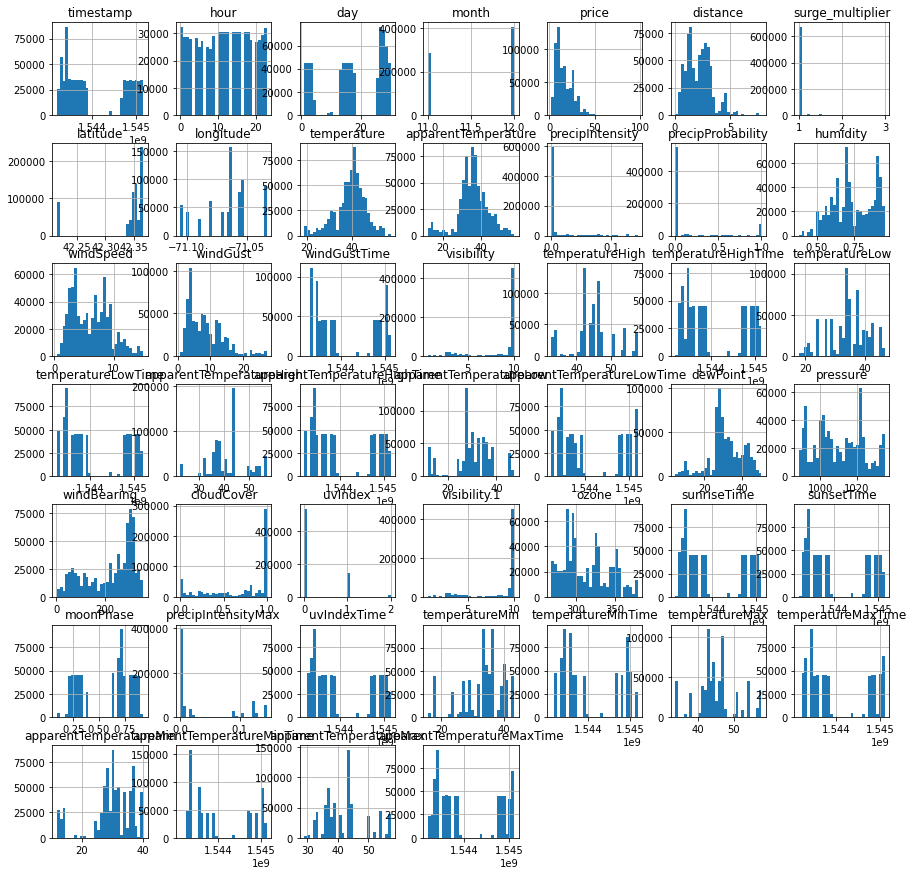

In [9]:
uber_dataset.hist(figsize=(15,15),bins=30)

In [10]:
len(uber_dataset[uber_dataset.duplicated()])

0

In [11]:
uber_dataset = uber_dataset.dropna()

In [12]:
uber_dataset.isnull().sum()

id                             0
timestamp                      0
hour                           0
day                            0
month                          0
datetime                       0
timezone                       0
source                         0
destination                    0
product_id                     0
name                           0
price                          0
distance                       0
surge_multiplier               0
latitude                       0
longitude                      0
temperature                    0
apparentTemperature            0
short_summary                  0
long_summary                   0
precipIntensity                0
precipProbability              0
humidity                       0
windSpeed                      0
windGust                       0
windGustTime                   0
visibility                     0
temperatureHigh                0
temperatureHighTime            0
temperatureLow                 0
temperatur

## 3. Feature Engineering
-----------------------------------------------------



### Ploting

In [13]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import seaborn as sns
import pandas as pd

#### Strip Plots

<AxesSubplot:xlabel='price', ylabel='name'>

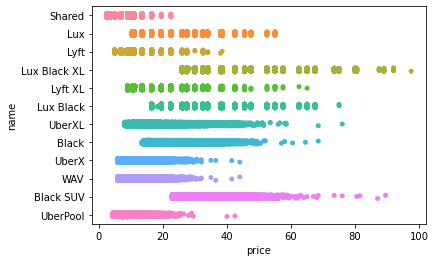

In [14]:
sns.stripplot(data=uber_dataset, x='price', y='name')

<AxesSubplot:xlabel='price', ylabel='icon'>

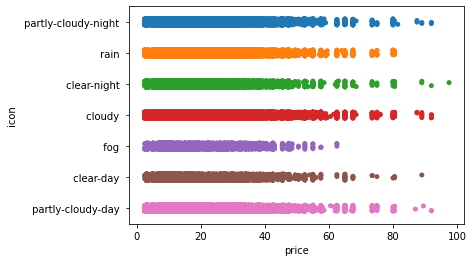

In [15]:
sns.stripplot(data=uber_dataset, x='price', y='icon')

<AxesSubplot:xlabel='surge_multiplier', ylabel='source'>

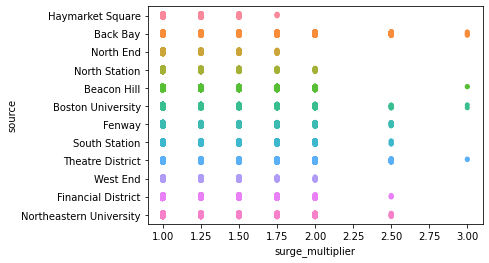

In [16]:
sns.stripplot(data=uber_dataset, x='surge_multiplier', y='source')

<AxesSubplot:xlabel='surge_multiplier', ylabel='hour'>

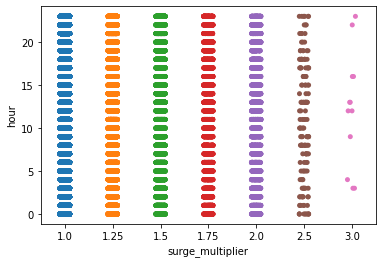

In [17]:
sns.stripplot(data=uber_dataset, x='surge_multiplier', y='hour')

#### Converting Timestamp to Datetime value

In [18]:
uber_dataset['timestamp'].head()

0    1.544953e+09
1    1.543284e+09
2    1.543367e+09
3    1.543554e+09
4    1.543463e+09
Name: timestamp, dtype: float64

In [19]:
from datetime import datetime
timestamp1 = 1544952608
timestamp2 = 1543284024
timestamp3 = 1543818483
timestamp4 = 1543594384
timestamp5 = 1544728504
dt_object1 = datetime.fromtimestamp(timestamp1)
dt_object2 = datetime.fromtimestamp(timestamp2)
dt_object3 = datetime.fromtimestamp(timestamp3)
dt_object4 = datetime.fromtimestamp(timestamp4)
dt_object5 = datetime.fromtimestamp(timestamp5)

print("dt_object =", dt_object1)
print("dt_object =", dt_object2)
print("dt_object =", dt_object3)
print("dt_object =", dt_object4)
print("dt_object =", dt_object5)

dt_object = 2018-12-16 15:00:08
dt_object = 2018-11-27 07:30:24
dt_object = 2018-12-03 11:58:03
dt_object = 2018-11-30 21:43:04
dt_object = 2018-12-14 00:45:04


- So by this timestamp to datetime conversion we get to know that, our data is of the year 2018 and in the month of november and december only

#### Bar plots

<AxesSubplot:>

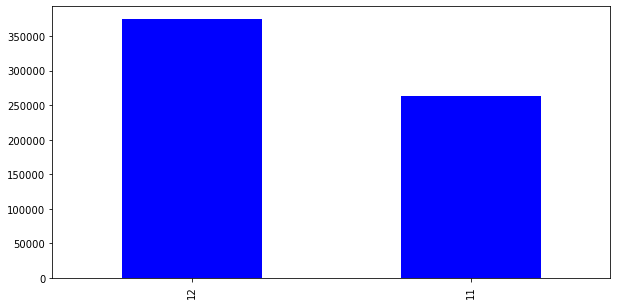

In [20]:
uber_dataset['month'].value_counts().plot(kind='bar', figsize=(10,5), color='blue')

<AxesSubplot:>

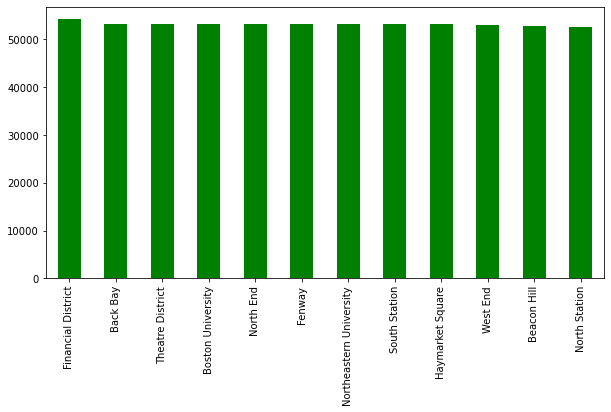

In [21]:
uber_dataset['source'].value_counts().plot(kind='bar', figsize=(10,5), color='green')

<AxesSubplot:>

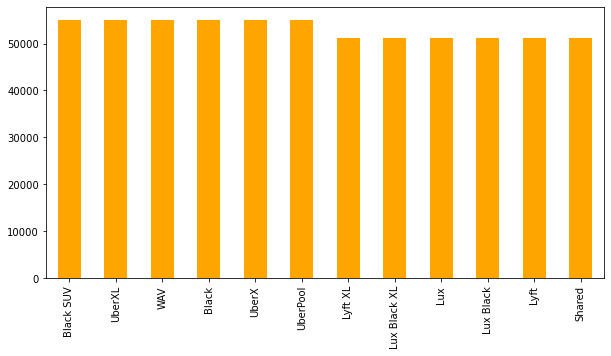

In [22]:
uber_dataset['name'].value_counts().plot(kind='bar', figsize=(10,5), color='orange')

<AxesSubplot:>

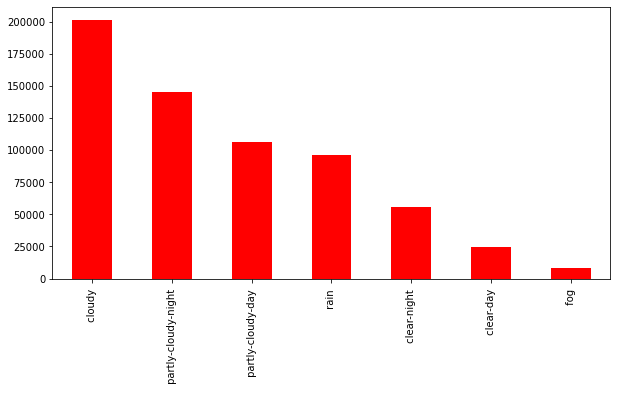

In [23]:
uber_dataset['icon'].value_counts().plot(kind='bar', figsize=(10,5), color='red')

<AxesSubplot:>

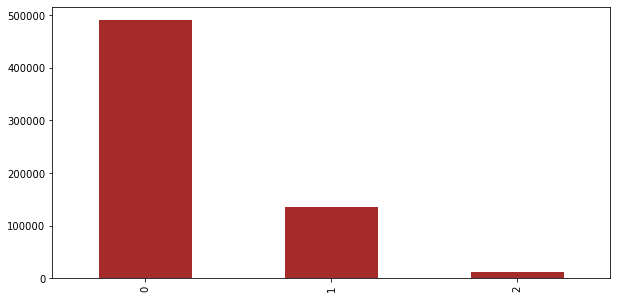

In [24]:
uber_dataset['uvIndex'].value_counts().plot(kind='bar', figsize=(10,5), color='brown')

<AxesSubplot:>

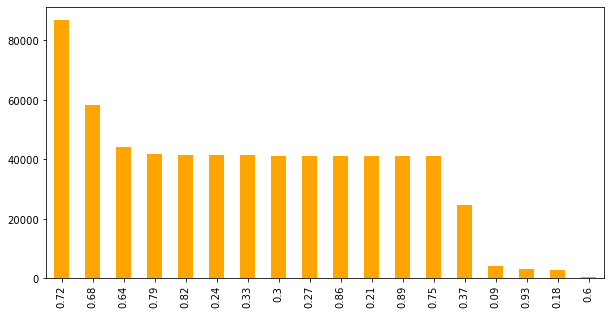

In [25]:
uber_dataset['moonPhase'].value_counts().plot(kind='bar', figsize=(10,5), color='orange')

<AxesSubplot:>

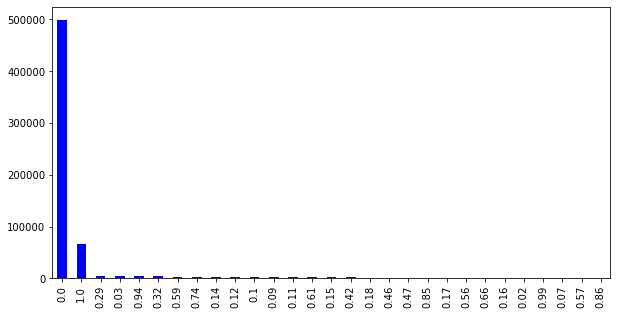

In [26]:
uber_dataset['precipProbability'].value_counts().plot(kind='bar', figsize=(10,5), color='blue')

### Label Encoding

In [27]:
# Import label encoder 
from sklearn import preprocessing 
  
# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder() 

In [28]:
uber_dataset.dtypes


id                              object
timestamp                      float64
hour                             int64
day                              int64
month                            int64
datetime                        object
timezone                        object
source                          object
destination                     object
product_id                      object
name                            object
price                          float64
distance                       float64
surge_multiplier               float64
latitude                       float64
longitude                      float64
temperature                    float64
apparentTemperature            float64
short_summary                   object
long_summary                    object
precipIntensity                float64
precipProbability              float64
humidity                       float64
windSpeed                      float64
windGust                       float64
windGustTime             

In [29]:
uber_dataset = uber_dataset.drop(['id'],axis=1)

In [30]:
uber_dataset.head()

,timestamp,hour,day,month,datetime,timezone,source,destination,product_id,name,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,1.544953e+09,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,lyft_line,Shared,...,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,1.543284e+09,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,lyft_premier,Lux,...,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
2,1.543367e+09,1,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,lyft,Lyft,...,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000
3,1.543554e+09,4,30,11,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,lyft_luxsuv,Lux Black XL,...,0.0000,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800
4,1.543463e+09,3,29,11,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,lyft_plus,Lyft XL,...,0.0001,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800


In [32]:
uber_dataset['datetime']= label_encoder.fit_transform(uber_dataset['datetime'])

print("Class mapping of datetime: ")
for i, item in enumerate(label_encoder.classes_):
    print(item, "-->", i)

Class mapping of datetime: 
2018-11-26 03:40:46 --> 0
2018-11-26 03:40:47 --> 1
2018-11-26 04:40:55 --> 2
2018-11-26 04:40:56 --> 3
2018-11-26 04:40:57 --> 4
2018-11-26 04:41:36 --> 5
2018-11-26 04:41:37 --> 6
2018-11-26 04:41:38 --> 7
2018-11-26 04:43:18 --> 8
2018-11-26 04:43:19 --> 9
2018-11-26 04:43:20 --> 10
2018-11-26 04:49:37 --> 11
2018-11-26 04:49:38 --> 12
2018-11-26 04:49:39 --> 13
2018-11-26 04:49:40 --> 14
2018-11-26 04:55:44 --> 15
2018-11-26 04:55:45 --> 16
2018-11-26 04:55:46 --> 17
2018-11-26 05:03:00 --> 18
2018-11-26 05:03:01 --> 19
2018-11-26 05:03:02 --> 20
2018-11-26 05:13:05 --> 21
2018-11-26 05:13:06 --> 22
2018-11-26 05:14:00 --> 23
2018-11-26 05:14:01 --> 24
2018-11-26 05:14:02 --> 25
2018-11-26 05:17:46 --> 26
2018-11-26 05:17:47 --> 27
2018-11-26 05:28:06 --> 28
2018-11-26 05:28:07 --> 29
2018-11-26 05:28:08 --> 30
2018-11-26 05:29:16 --> 31
2018-11-26 05:29:17 --> 32
2018-11-26 05:29:18 --> 33
2018-11-26 05:29:19 --> 34
2018-11-26 05:36:25 --> 35
2018-11-26

In [33]:
uber_dataset['timezone']= label_encoder.fit_transform(uber_dataset['timezone'])

print("Class mapping of timezone: ")
for i, item in enumerate(label_encoder.classes_):
    print(item, "-->", i)

Class mapping of timezone: 
America/New_York --> 0


In [34]:
uber_dataset['destination']= label_encoder.fit_transform(uber_dataset['destination'])

print("Class mapping of destination: ")
for i, item in enumerate(label_encoder.classes_):
    print(item, "-->", i)

Class mapping of destination: 
Back Bay --> 0
Beacon Hill --> 1
Boston University --> 2
Fenway --> 3
Financial District --> 4
Haymarket Square --> 5
North End --> 6
North Station --> 7
Northeastern University --> 8
South Station --> 9
Theatre District --> 10
West End --> 11


In [35]:
uber_dataset['short_summary']= label_encoder.fit_transform(uber_dataset['short_summary'])

print("Class mapping of short_summary: ")
for i, item in enumerate(label_encoder.classes_):
    print(item, "-->", i)

Class mapping of short_summary: 
 Clear  --> 0
 Drizzle  --> 1
 Foggy  --> 2
 Light Rain  --> 3
 Mostly Cloudy  --> 4
 Overcast  --> 5
 Partly Cloudy  --> 6
 Possible Drizzle  --> 7
 Rain  --> 8


In [36]:
uber_dataset['product_id']= label_encoder.fit_transform(uber_dataset['product_id'])

print("Class mapping of product_id: ")
for i, item in enumerate(label_encoder.classes_):
    print(item, "-->", i)

Class mapping of product_id: 
55c66225-fbe7-4fd5-9072-eab1ece5e23e --> 0
6c84fd89-3f11-4782-9b50-97c468b19529 --> 1
6d318bcc-22a3-4af6-bddd-b409bfce1546 --> 2
6f72dfc5-27f1-42e8-84db-ccc7a75f6969 --> 3
997acbb5-e102-41e1-b155-9df7de0a73f2 --> 4
9a0e7b09-b92b-4c41-9779-2ad22b4d779d --> 5
lyft --> 6
lyft_line --> 7
lyft_lux --> 8
lyft_luxsuv --> 9
lyft_plus --> 10
lyft_premier --> 11


In [37]:
uber_dataset['long_summary']= label_encoder.fit_transform(uber_dataset['long_summary'])

print("Class mapping of long_summary: ")
for i, item in enumerate(label_encoder.classes_):
    print(item, "-->", i)

Class mapping of long_summary: 
 Foggy in the morning.  --> 0
 Light rain in the morning and overnight.  --> 1
 Light rain in the morning.  --> 2
 Light rain until evening.  --> 3
 Mostly cloudy throughout the day.  --> 4
 Overcast throughout the day.  --> 5
 Partly cloudy throughout the day.  --> 6
 Possible drizzle in the morning.  --> 7
 Rain in the morning and afternoon.  --> 8
 Rain throughout the day.  --> 9
 Rain until morning, starting again in the evening.  --> 10


In [38]:
uber_dataset['name']= label_encoder.fit_transform(uber_dataset['name'])

print("Class mapping of Name: ")
for i, item in enumerate(label_encoder.classes_):
    print(item, "-->", i)

Class mapping of Name: 
Black --> 0
Black SUV --> 1
Lux --> 2
Lux Black --> 3
Lux Black XL --> 4
Lyft --> 5
Lyft XL --> 6
Shared --> 7
UberPool --> 8
UberX --> 9
UberXL --> 10
WAV --> 11


In [39]:
uber_dataset['source']= label_encoder.fit_transform(uber_dataset['source'])

print("Class mapping of Source: ")
for i, item in enumerate(label_encoder.classes_):
    print(item, "-->", i)

Class mapping of Source: 
Back Bay --> 0
Beacon Hill --> 1
Boston University --> 2
Fenway --> 3
Financial District --> 4
Haymarket Square --> 5
North End --> 6
North Station --> 7
Northeastern University --> 8
South Station --> 9
Theatre District --> 10
West End --> 11


In [40]:
uber_dataset['icon']= label_encoder.fit_transform(uber_dataset['icon'])

print("Class mapping of Icon: ")
for i, item in enumerate(label_encoder.classes_):
    print(item, "-->", i)

Class mapping of Icon: 
 clear-day  --> 0
 clear-night  --> 1
 cloudy  --> 2
 fog  --> 3
 partly-cloudy-day  --> 4
 partly-cloudy-night  --> 5
 rain  --> 6


In [41]:
uber_dataset.dtypes

timestamp                      float64
hour                             int64
day                              int64
month                            int64
datetime                         int32
timezone                         int32
source                           int32
destination                      int32
product_id                       int32
name                             int32
price                          float64
distance                       float64
surge_multiplier               float64
latitude                       float64
longitude                      float64
temperature                    float64
apparentTemperature            float64
short_summary                    int32
long_summary                     int32
precipIntensity                float64
precipProbability              float64
humidity                       float64
windSpeed                      float64
windGust                       float64
windGustTime                     int64
visibility               

In [42]:
uber_dataset.head()

,timestamp,hour,day,month,datetime,timezone,source,destination,product_id,name,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,1.544953e+09,9,16,12,25351,0,5,7,7,7,...,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,1.543284e+09,2,27,11,961,0,5,7,11,2,...,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
2,1.543367e+09,1,28,11,2534,0,5,7,6,5,...,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000
3,1.543554e+09,4,30,11,6988,0,5,7,9,4,...,0.0000,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800
4,1.543463e+09,3,29,11,4400,0,5,7,10,6,...,0.0001,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800


### Filling NAN Values

In [43]:
uber_dataset.isnull().sum()

timestamp                      0
hour                           0
day                            0
month                          0
datetime                       0
timezone                       0
source                         0
destination                    0
product_id                     0
name                           0
price                          0
distance                       0
surge_multiplier               0
latitude                       0
longitude                      0
temperature                    0
apparentTemperature            0
short_summary                  0
long_summary                   0
precipIntensity                0
precipProbability              0
humidity                       0
windSpeed                      0
windGust                       0
windGustTime                   0
visibility                     0
temperatureHigh                0
temperatureHighTime            0
temperatureLow                 0
temperatureLowTime             0
apparentTe

In [44]:
uber_dataset['price'].median()

13.5

In [45]:
uber_dataset["price"].fillna(10.5, inplace = True) 

In [46]:
uber_dataset.isnull().sum()

timestamp                      0
hour                           0
day                            0
month                          0
datetime                       0
timezone                       0
source                         0
destination                    0
product_id                     0
name                           0
price                          0
distance                       0
surge_multiplier               0
latitude                       0
longitude                      0
temperature                    0
apparentTemperature            0
short_summary                  0
long_summary                   0
precipIntensity                0
precipProbability              0
humidity                       0
windSpeed                      0
windGust                       0
windGustTime                   0
visibility                     0
temperatureHigh                0
temperatureHighTime            0
temperatureLow                 0
temperatureLowTime             0
apparentTe

In [47]:
uber_dataset['price'].dtype

dtype('float64')

In [48]:
uber_dataset['price'] = uber_dataset['price'].astype(int)

In [49]:
# By using scipy stats we use Q1 , Q3 and IQR to find outliers.
from scipy import stats
Q1=uber_dataset['price'].quantile(0.25)
print(Q1)
Q3=uber_dataset['price'].quantile(0.75)
print(Q3)


9.0
22.0


In [50]:
IQR=stats.iqr(uber_dataset['price'])
IQR

13.0

In [51]:
lower_limit=Q1-1.5*IQR
upper_limit=Q1+1.5*IQR
print(lower_limit,upper_limit)

-10.5 28.5


In [52]:
#By using filter we are checking outliers in dataset
df_outliers=uber_dataset[(uber_dataset['price']<lower_limit)|(uber_dataset['price']>upper_limit)]
len(df_outliers)

69488

In [53]:
#checking the shape of outliers
df_outliers.shape

(69488, 55)

In [54]:
# For removing of outlier we need to find indexes of outlier . 
outlier_index=uber_dataset[(uber_dataset['price']<lower_limit)|(uber_dataset['price']>upper_limit)].index
outlier_index

Int64Index([    37,     80,     88,     93,    101,    109,    120,    129,
               132,    145,
            ...
            692977, 692991, 692996, 693006, 693007, 693011, 693017, 693024,
            693031, 693053],
           dtype='int64', length=69488)

In [56]:
#Droping outlier
uber_dataset.drop(outlier_index,inplace=True)

<AxesSubplot:xlabel='price', ylabel='Count'>

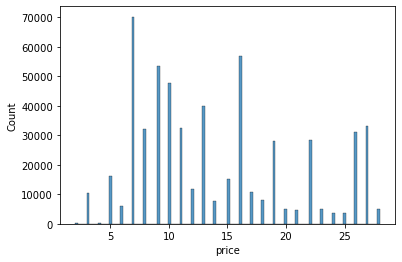

In [57]:
#Ckecking distribution after removing outliers
sns.histplot(uber_dataset['price'])

In [58]:
uber_dataset['price'].head()

0     5
1    11
2     7
3    26
4     9
Name: price, dtype: int32

### RFE (Recursive Feature Elimination)

In [59]:
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [60]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [61]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [62]:
from sklearn.feature_selection import RFE

In [63]:
X = uber_dataset.drop('price', axis = 1)
y = uber_dataset['price']

In [64]:
X.head()

,timestamp,hour,day,month,datetime,timezone,source,destination,product_id,name,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,1.544953e+09,9,16,12,25351,0,5,7,7,7,...,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,1.543284e+09,2,27,11,961,0,5,7,11,2,...,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
2,1.543367e+09,1,28,11,2534,0,5,7,6,5,...,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000
3,1.543554e+09,4,30,11,6988,0,5,7,9,4,...,0.0000,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800
4,1.543463e+09,3,29,11,4400,0,5,7,10,6,...,0.0001,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800


In [65]:
y.head()

0     5
1    11
2     7
3    26
4     9
Name: price, dtype: int32

In [66]:
X.shape

(568488, 54)

In [67]:
y.shape

(568488,)

<AxesSubplot:>

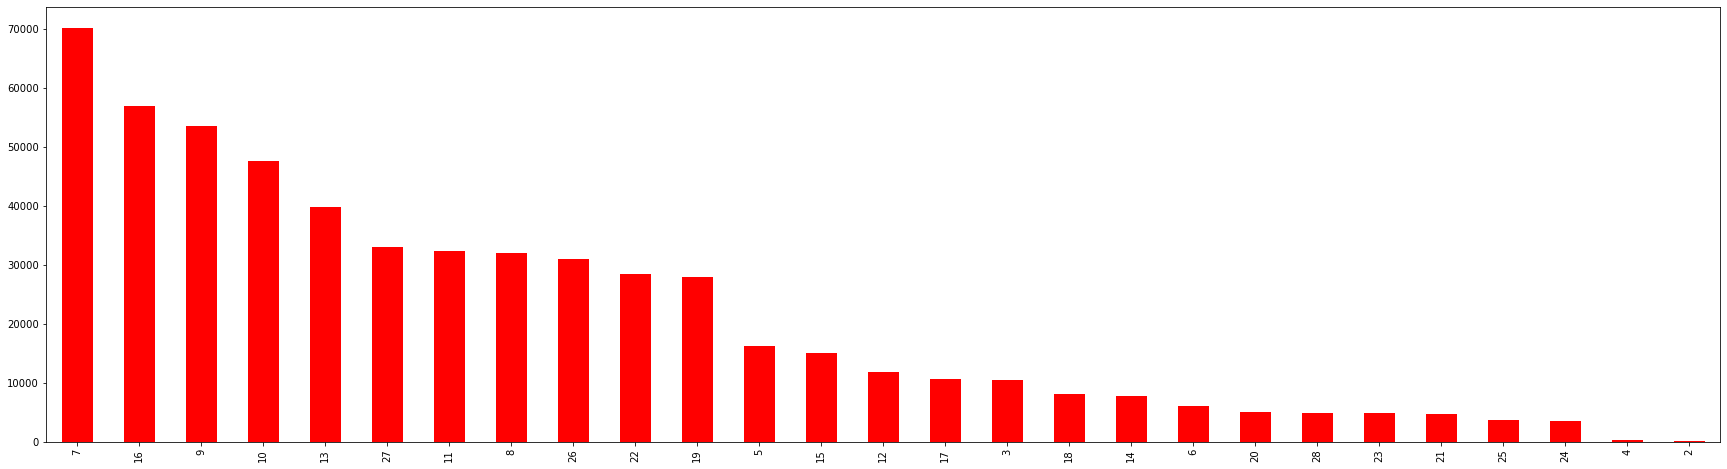

In [68]:
y.value_counts().plot(kind='bar',figsize=(30,8),color='red')

#### Training accuracy in 56 features

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [70]:
X_train.shape

(454790, 54)

In [71]:
X_test.shape

(113698, 54)

In [72]:
y_train.shape

(454790,)

In [73]:
y_test.shape

(113698,)

In [74]:
X_train.head()

,timestamp,hour,day,month,datetime,timezone,source,destination,product_id,name,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
149932,1.544758e+09,3,14,12,19612,0,1,3,10,6,...,0.0001,1544716800,18.24,1544688000,33.96,1544731200,13.72,1544688000,32.95,1544734800
245158,1.543416e+09,14,28,11,3128,0,1,2,5,11,...,0.0000,1543420800,33.75,1543399200,42.60,1543438800,29.97,1543399200,36.58,1543438800
355294,1.543837e+09,11,3,12,15021,0,6,10,3,10,...,0.0004,1543852800,42.86,1543896000,57.08,1543852800,39.54,1543896000,56.41,1543852800
610988,1.544398e+09,23,9,12,16967,0,7,2,4,8,...,0.0003,1544374800,15.95,1544353200,35.97,1544378400,14.08,1544356800,29.83,1544378400
437268,1.544807e+09,17,14,12,21024,0,2,7,5,11,...,0.0000,1544806800,26.93,1544788800,46.68,1544814000,27.58,1544788800,43.98,1544817600


In [75]:
#Creating model
reg = LinearRegression()
#Fitting training data
reg = reg.fit(X_train, y_train)

In [76]:
reg.score(X_train, y_train)

0.42706270293128856

In [77]:
rfe = RFE(estimator=reg, n_features_to_select=40, step=1, verbose=1)
rfe.fit(X, y)


Fitting estimator with 54 features.
Fitting estimator with 53 features.
Fitting estimator with 52 features.
Fitting estimator with 51 features.
Fitting estimator with 50 features.
Fitting estimator with 49 features.
Fitting estimator with 48 features.
Fitting estimator with 47 features.
Fitting estimator with 46 features.
Fitting estimator with 45 features.
Fitting estimator with 44 features.
Fitting estimator with 43 features.
Fitting estimator with 42 features.
Fitting estimator with 41 features.


RFE(estimator=LinearRegression(), n_features_to_select=40, verbose=1)

#### Training accuracy in 40 features

In [78]:
rfe.support_

array([False,  True,  True,  True, False, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False,  True,  True, False,
        True, False,  True, False,  True, False,  True,  True,  True,
        True,  True,  True, False,  True,  True,  True,  True,  True,
       False,  True, False,  True, False,  True, False,  True, False])

In [79]:
XX = X[X.columns[rfe.support_]]

In [80]:
XX.head()

,hour,day,month,source,destination,product_id,name,distance,surge_multiplier,latitude,...,uvIndex,ozone,sunriseTime,sunsetTime,moonPhase,precipIntensityMax,temperatureMin,temperatureMax,apparentTemperatureMin,apparentTemperatureMax
0,9,16,12,5,7,7,7,0.44,1.0,42.2148,...,0,303.8,1544962084,1544994864,0.30,0.1276,39.89,43.68,33.73,38.07
1,2,27,11,5,7,11,2,0.44,1.0,42.2148,...,0,291.1,1543232969,1543266992,0.64,0.1300,40.49,47.30,36.20,43.92
2,1,28,11,5,7,6,5,0.44,1.0,42.2148,...,0,315.7,1543319437,1543353364,0.68,0.1064,35.36,47.55,31.04,44.12
3,4,30,11,5,7,9,4,0.44,1.0,42.2148,...,0,291.1,1543492370,1543526114,0.75,0.0000,34.67,45.03,30.30,38.53
4,3,29,11,5,7,10,6,0.44,1.0,42.2148,...,0,347.7,1543405904,1543439738,0.72,0.0001,33.10,42.18,29.11,35.75


In [81]:
X_train, X_test, y_train, y_test = train_test_split(XX, y, test_size = 0.3, random_state = 10)

In [82]:
X_train.shape

(397941, 40)

In [83]:
#Creating model
reg1 = LinearRegression()
#Fitting training data
reg1 = reg1.fit(X_train, y_train)

In [84]:
reg1.score(X_train, y_train)

0.4269051343258027

In [85]:
rfe = RFE(estimator=reg, n_features_to_select=15, step=1, verbose=1)
rfe.fit(X, y)

Fitting estimator with 54 features.
Fitting estimator with 53 features.
Fitting estimator with 52 features.
Fitting estimator with 51 features.
Fitting estimator with 50 features.
Fitting estimator with 49 features.
Fitting estimator with 48 features.
Fitting estimator with 47 features.
Fitting estimator with 46 features.
Fitting estimator with 45 features.
Fitting estimator with 44 features.
Fitting estimator with 43 features.
Fitting estimator with 42 features.
Fitting estimator with 41 features.
Fitting estimator with 40 features.
Fitting estimator with 39 features.
Fitting estimator with 38 features.
Fitting estimator with 37 features.
Fitting estimator with 36 features.
Fitting estimator with 35 features.
Fitting estimator with 34 features.
Fitting estimator with 33 features.
Fitting estimator with 32 features.
Fitting estimator with 31 features.
Fitting estimator with 30 features.
Fitting estimator with 29 features.
Fitting estimator with 28 features.
Fitting estimator with 27 fe

RFE(estimator=LinearRegression(), n_features_to_select=15, verbose=1)

#### Training accuracy in 15 features

In [86]:
XX = X[X.columns[rfe.support_]]

In [87]:
XX.head()

,source,product_id,name,distance,surge_multiplier,latitude,longitude,precipIntensity,precipProbability,temperatureHigh,apparentTemperatureHigh,cloudCover,moonPhase,temperatureMax,apparentTemperatureMax
0,5,7,7,0.44,1.0,42.2148,-71.033,0.0000,0.0,43.68,37.95,0.72,0.30,43.68,38.07
1,5,11,2,0.44,1.0,42.2148,-71.033,0.1299,1.0,47.30,43.92,1.00,0.64,47.30,43.92
2,5,6,5,0.44,1.0,42.2148,-71.033,0.0000,0.0,47.55,44.12,0.03,0.68,47.55,44.12
3,5,9,4,0.44,1.0,42.2148,-71.033,0.0000,0.0,45.03,38.53,0.00,0.75,45.03,38.53
4,5,10,6,0.44,1.0,42.2148,-71.033,0.0000,0.0,42.18,35.75,0.44,0.72,42.18,35.75


In [88]:
X_train, X_test, y_train, y_test = train_test_split(XX, y, test_size = 0.3, random_state = 10,)

In [89]:
X_train.shape

(397941, 15)

In [90]:
#Creating model
reg1 = LinearRegression()
#Fitting training data
reg1 = reg1.fit(X_train, y_train)

In [91]:
reg1.score(X_train, y_train)

0.4268661264047756

In [92]:
rfe = RFE(estimator=reg, n_features_to_select=25, step=1, verbose=1)
rfe.fit(X, y)

Fitting estimator with 54 features.
Fitting estimator with 53 features.
Fitting estimator with 52 features.
Fitting estimator with 51 features.
Fitting estimator with 50 features.
Fitting estimator with 49 features.
Fitting estimator with 48 features.
Fitting estimator with 47 features.
Fitting estimator with 46 features.
Fitting estimator with 45 features.
Fitting estimator with 44 features.
Fitting estimator with 43 features.
Fitting estimator with 42 features.
Fitting estimator with 41 features.
Fitting estimator with 40 features.
Fitting estimator with 39 features.
Fitting estimator with 38 features.
Fitting estimator with 37 features.
Fitting estimator with 36 features.
Fitting estimator with 35 features.
Fitting estimator with 34 features.
Fitting estimator with 33 features.
Fitting estimator with 32 features.
Fitting estimator with 31 features.
Fitting estimator with 30 features.
Fitting estimator with 29 features.
Fitting estimator with 28 features.
Fitting estimator with 27 fe

RFE(estimator=LinearRegression(), n_features_to_select=25, verbose=1)

#### Training accuracy in 25 features

In [93]:
XX = X[X.columns[rfe.support_]]

In [94]:
XX.head()

,month,source,destination,product_id,name,distance,surge_multiplier,latitude,longitude,temperature,...,apparentTemperatureHigh,apparentTemperatureLow,dewPoint,cloudCover,moonPhase,precipIntensityMax,temperatureMin,temperatureMax,apparentTemperatureMin,apparentTemperatureMax
0,12,5,7,7,7,0.44,1.0,42.2148,-71.033,42.34,...,37.95,27.39,32.70,0.72,0.30,0.1276,39.89,43.68,33.73,38.07
1,11,5,7,11,2,0.44,1.0,42.2148,-71.033,43.58,...,43.92,36.20,41.83,1.00,0.64,0.1300,40.49,47.30,36.20,43.92
2,11,5,7,6,5,0.44,1.0,42.2148,-71.033,38.33,...,44.12,29.11,31.10,0.03,0.68,0.1064,35.36,47.55,31.04,44.12
3,11,5,7,9,4,0.44,1.0,42.2148,-71.033,34.38,...,38.53,26.20,26.64,0.00,0.75,0.0000,34.67,45.03,30.30,38.53
4,11,5,7,10,6,0.44,1.0,42.2148,-71.033,37.44,...,35.75,30.29,28.61,0.44,0.72,0.0001,33.10,42.18,29.11,35.75


In [95]:
X_train, X_test, y_train, y_test = train_test_split(XX, y, test_size = 0.3, random_state = 20,)

In [96]:
X_train.shape

(397941, 25)

In [97]:
#Creating model
reg1 = LinearRegression()
#Fitting training data
reg1 = reg1.fit(X_train, y_train)
#Y prediction
Y_pred = reg1.predict(X_test)

In [98]:
reg1.score(X_train, y_train)

0.42734024112153546

- Since we find the accuracy for  k = 56 , 40 , 25 and 15. 
- Hence we noticed that the when k = 25 we get the maximum training accuracy in Linear Regression Model

### 25 Columns After RFE

In [99]:
XX.columns

Index(['month', 'source', 'destination', 'product_id', 'name', 'distance',
       'surge_multiplier', 'latitude', 'longitude', 'temperature',
       'precipIntensity', 'precipProbability', 'humidity', 'temperatureHigh',
       'temperatureLow', 'apparentTemperatureHigh', 'apparentTemperatureLow',
       'dewPoint', 'cloudCover', 'moonPhase', 'precipIntensityMax',
       'temperatureMin', 'temperatureMax', 'apparentTemperatureMin',
       'apparentTemperatureMax'],
      dtype='object')

In [100]:
feature = ['month', 'source', 'destination', 'product_id', 'name', 'distance',
       'surge_multiplier', 'latitude', 'longitude', 'temperature',
       'precipIntensity', 'precipProbability', 'humidity', 'temperatureHigh',
       'temperatureLow', 'apparentTemperatureHigh', 'apparentTemperatureLow',
       'dewPoint', 'cloudCover', 'moonPhase', 'precipIntensityMax',
       'temperatureMin', 'temperatureMax', 'apparentTemperatureMin',
       'apparentTemperatureMax']
print(len(feature))

25


In [101]:
XX.shape

(568488, 25)

In [102]:
XX.head()

,month,source,destination,product_id,name,distance,surge_multiplier,latitude,longitude,temperature,...,apparentTemperatureHigh,apparentTemperatureLow,dewPoint,cloudCover,moonPhase,precipIntensityMax,temperatureMin,temperatureMax,apparentTemperatureMin,apparentTemperatureMax
0,12,5,7,7,7,0.44,1.0,42.2148,-71.033,42.34,...,37.95,27.39,32.70,0.72,0.30,0.1276,39.89,43.68,33.73,38.07
1,11,5,7,11,2,0.44,1.0,42.2148,-71.033,43.58,...,43.92,36.20,41.83,1.00,0.64,0.1300,40.49,47.30,36.20,43.92
2,11,5,7,6,5,0.44,1.0,42.2148,-71.033,38.33,...,44.12,29.11,31.10,0.03,0.68,0.1064,35.36,47.55,31.04,44.12
3,11,5,7,9,4,0.44,1.0,42.2148,-71.033,34.38,...,38.53,26.20,26.64,0.00,0.75,0.0000,34.67,45.03,30.30,38.53
4,11,5,7,10,6,0.44,1.0,42.2148,-71.033,37.44,...,35.75,30.29,28.61,0.44,0.72,0.0001,33.10,42.18,29.11,35.75


### Drop Useless Features

In [103]:
new_uber = XX[['month', 'source', 'destination', 'product_id', 'name', 'distance',
       'surge_multiplier', 'latitude', 'longitude', 'temperature',
       'precipIntensity', 'precipProbability', 'humidity', 'temperatureHigh',
       'temperatureLow', 'apparentTemperatureHigh', 'apparentTemperatureLow',
       'dewPoint', 'cloudCover', 'moonPhase', 'precipIntensityMax',
       'temperatureMin', 'temperatureMax', 'apparentTemperatureMin',
       'apparentTemperatureMax']]

In [104]:
new_uber.shape

(568488, 25)

In [106]:
new_uber.head()

,month,source,destination,product_id,name,distance,surge_multiplier,latitude,longitude,temperature,...,apparentTemperatureHigh,apparentTemperatureLow,dewPoint,cloudCover,moonPhase,precipIntensityMax,temperatureMin,temperatureMax,apparentTemperatureMin,apparentTemperatureMax
0,12,5,7,7,7,0.44,1.0,42.2148,-71.033,42.34,...,37.95,27.39,32.70,0.72,0.30,0.1276,39.89,43.68,33.73,38.07
1,11,5,7,11,2,0.44,1.0,42.2148,-71.033,43.58,...,43.92,36.20,41.83,1.00,0.64,0.1300,40.49,47.30,36.20,43.92
2,11,5,7,6,5,0.44,1.0,42.2148,-71.033,38.33,...,44.12,29.11,31.10,0.03,0.68,0.1064,35.36,47.55,31.04,44.12
3,11,5,7,9,4,0.44,1.0,42.2148,-71.033,34.38,...,38.53,26.20,26.64,0.00,0.75,0.0000,34.67,45.03,30.30,38.53
4,11,5,7,10,6,0.44,1.0,42.2148,-71.033,37.44,...,35.75,30.29,28.61,0.44,0.72,0.0001,33.10,42.18,29.11,35.75


In [107]:
new_uber.shape

(568488, 25)

### Binning

In [108]:
month_mapping = {11: 0, 12: 1}
new_uber['month'] = new_uber['month'].map(month_mapping)

In [109]:
surge_multiplier_mapping = {1.: 0, 1.25: 1, 1.5: 2, 1.75: 3, 2.:4}
new_uber['surge_multiplier'] = new_uber['surge_multiplier'].map(surge_multiplier_mapping)

### Final Dataset

In [110]:
new_uber.head()

,month,source,destination,product_id,name,distance,surge_multiplier,latitude,longitude,temperature,...,apparentTemperatureHigh,apparentTemperatureLow,dewPoint,cloudCover,moonPhase,precipIntensityMax,temperatureMin,temperatureMax,apparentTemperatureMin,apparentTemperatureMax
0,1,5,7,7,7,0.44,0.0,42.2148,-71.033,42.34,...,37.95,27.39,32.70,0.72,0.30,0.1276,39.89,43.68,33.73,38.07
1,0,5,7,11,2,0.44,0.0,42.2148,-71.033,43.58,...,43.92,36.20,41.83,1.00,0.64,0.1300,40.49,47.30,36.20,43.92
2,0,5,7,6,5,0.44,0.0,42.2148,-71.033,38.33,...,44.12,29.11,31.10,0.03,0.68,0.1064,35.36,47.55,31.04,44.12
3,0,5,7,9,4,0.44,0.0,42.2148,-71.033,34.38,...,38.53,26.20,26.64,0.00,0.75,0.0000,34.67,45.03,30.30,38.53
4,0,5,7,10,6,0.44,0.0,42.2148,-71.033,37.44,...,35.75,30.29,28.61,0.44,0.72,0.0001,33.10,42.18,29.11,35.75


In [111]:
y.head()

0     5
1    11
2     7
3    26
4     9
Name: price, dtype: int32

## 4. Modeling
-----------------------------------------------------

In [112]:
new_uber.shape

(568488, 25)

In [113]:
y.shape

(568488,)

In [114]:
new_uber.head()

,month,source,destination,product_id,name,distance,surge_multiplier,latitude,longitude,temperature,...,apparentTemperatureHigh,apparentTemperatureLow,dewPoint,cloudCover,moonPhase,precipIntensityMax,temperatureMin,temperatureMax,apparentTemperatureMin,apparentTemperatureMax
0,1,5,7,7,7,0.44,0.0,42.2148,-71.033,42.34,...,37.95,27.39,32.70,0.72,0.30,0.1276,39.89,43.68,33.73,38.07
1,0,5,7,11,2,0.44,0.0,42.2148,-71.033,43.58,...,43.92,36.20,41.83,1.00,0.64,0.1300,40.49,47.30,36.20,43.92
2,0,5,7,6,5,0.44,0.0,42.2148,-71.033,38.33,...,44.12,29.11,31.10,0.03,0.68,0.1064,35.36,47.55,31.04,44.12
3,0,5,7,9,4,0.44,0.0,42.2148,-71.033,34.38,...,38.53,26.20,26.64,0.00,0.75,0.0000,34.67,45.03,30.30,38.53
4,0,5,7,10,6,0.44,0.0,42.2148,-71.033,37.44,...,35.75,30.29,28.61,0.44,0.72,0.0001,33.10,42.18,29.11,35.75


In [115]:
y.head()

0     5
1    11
2     7
3    26
4     9
Name: price, dtype: int32

In [116]:
outlier_index=new_uber[new_uber.isin([np.nan, np.inf, -np.inf]).any(1)].index
outlier_index

Int64Index([   709,  11775,  14362,  21851,  81691,  81693, 106402, 109749,
            119733, 137085, 141104, 142023, 150288, 158161, 158162, 160091,
            162372, 186474, 197907, 209728, 215744, 215746, 216449, 220329,
            236868, 247562, 247563, 266611, 266612, 266805, 289791, 304704,
            308955, 308958, 314309, 314311, 317615, 317616, 341035, 341037,
            341499, 352880, 353000, 357245, 366298, 392537, 398127, 401301,
            401302, 407638, 407642, 408330, 426200, 430575, 430579, 441826,
            468407, 468412, 470190, 471675, 475449, 475450, 499100, 499550,
            514945, 520661, 521710, 525295, 525297, 538238, 538239, 539628,
            549477, 550327, 553942, 562604, 562605, 582291, 613222, 613226,
            617252, 638882, 638884, 649750, 658248, 658252, 664987, 665863,
            665864, 692257],
           dtype='int64')

In [117]:
new_uber.drop(outlier_index,inplace=True)

In [118]:
new_uber.shape

(568398, 25)

In [119]:
y.drop(outlier_index,inplace=True)

In [120]:
y.shape

(568398,)

In [122]:
y.shape

(568398,)

In [123]:
xx_train.shape

(454718, 25)

In [124]:
xx_test.shape

(113680, 25)

yy_train.shape

In [125]:
yy_train.shape

(454718,)

In [126]:
yy_test.shape

(113680,)

In [127]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor 

#### 4.1 Linear regression

In [130]:
xx_train.shape

(454718, 25)

In [131]:
len(yy_train)

454718

In [132]:
yy_train

81592      8
666432    27
46544     17
436762     3
524581    26
          ..
410891    26
545435    27
422062    11
446251    26
308394     7
Name: price, Length: 454718, dtype: int32

In [137]:
y.shape

(568398,)

In [138]:
linear = LinearRegression()
linear.fit(xx_train, yy_train)
linear.score(xx_train, yy_train)

0.4277015341357472

#### 4.2 Decision Tree

In [139]:
decision = DecisionTreeRegressor(random_state = 0)  
decision.fit(xx_train , yy_train) 
decision.score(xx_test, yy_test)

0.9221471197012124

#### 4.3 Gradient Boosting Regressor

In [141]:
from sklearn import ensemble
clf = ensemble.GradientBoostingRegressor(n_estimators = 400, max_depth = 5)
clf.fit(xx_train, yy_train)

GradientBoostingRegressor(max_depth=5, n_estimators=400)

In [142]:
clf.score(xx_test, yy_test)

0.9580053738407709

#### K fold Crossvalidation

In [143]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
cv=ShuffleSplit(n_splits=5,test_size=0.2,random_state=0)
cross_val_score(LinearRegression(),xx_test,yy_test,cv=cv)

array([0.42198192, 0.42238488, 0.42180958, 0.41984636, 0.42733175])

## 6. Testing
-----------------------------------------------------

#### Linear regression

In [144]:
linear.coef_

array([-0.03555221,  0.02685152,  0.01232307, -0.0980922 , -1.23071801,
        1.54910132,  1.49960382, -0.00837764,  0.7622384 ,  0.014139  ,
        0.1587251 , -0.04692178,  0.51289505,  0.06899856, -0.01435209,
       -0.04136673,  0.0113215 , -0.011932  ,  0.01786082, -0.12835764,
       -0.29772501,  0.00834169, -0.07369659, -0.00364437,  0.04231489])

In [145]:
prediction = linear.predict(xx_test)
prediction

array([ 7.99143561,  8.47674112, 16.27018999, ..., 11.31659061,
       11.17939412, 18.93108473])

In [146]:
prediction=  prediction.astype(int)

In [147]:
from sklearn import metrics
print('MAE :'," ", metrics.mean_absolute_error(yy_test,prediction))
print('MSE :'," ", metrics.mean_squared_error(yy_test,prediction))
print('RMAE :'," ", np.sqrt(metrics.mean_squared_error(yy_test,prediction)))

MAE :   4.1294334975369456
MSE :   26.543244194229416
RMAE :   5.1520136057884605


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

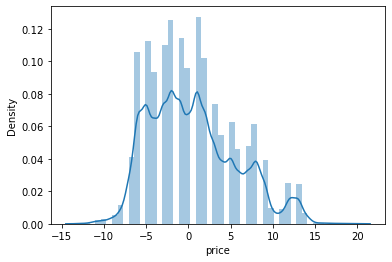

In [148]:
sns.distplot(yy_test - prediction,bins=50)

#### Price prediction function

In [153]:
new_uber.head()

,month,source,destination,product_id,name,distance,surge_multiplier,latitude,longitude,temperature,...,apparentTemperatureHigh,apparentTemperatureLow,dewPoint,cloudCover,moonPhase,precipIntensityMax,temperatureMin,temperatureMax,apparentTemperatureMin,apparentTemperatureMax
0,1,5,7,7,7,0.44,0.0,42.2148,-71.033,42.34,...,37.95,27.39,32.70,0.72,0.30,0.1276,39.89,43.68,33.73,38.07
1,0,5,7,11,2,0.44,0.0,42.2148,-71.033,43.58,...,43.92,36.20,41.83,1.00,0.64,0.1300,40.49,47.30,36.20,43.92
2,0,5,7,6,5,0.44,0.0,42.2148,-71.033,38.33,...,44.12,29.11,31.10,0.03,0.68,0.1064,35.36,47.55,31.04,44.12
3,0,5,7,9,4,0.44,0.0,42.2148,-71.033,34.38,...,38.53,26.20,26.64,0.00,0.75,0.0000,34.67,45.03,30.30,38.53
4,0,5,7,10,6,0.44,0.0,42.2148,-71.033,37.44,...,35.75,30.29,28.61,0.44,0.72,0.0001,33.10,42.18,29.11,35.75


In [155]:
new_uber.columns

Index(['month', 'source', 'destination', 'product_id', 'name', 'distance',
       'surge_multiplier', 'latitude', 'longitude', 'temperature',
       'precipIntensity', 'precipProbability', 'humidity', 'temperatureHigh',
       'temperatureLow', 'apparentTemperatureHigh', 'apparentTemperatureLow',
       'dewPoint', 'cloudCover', 'moonPhase', 'precipIntensityMax',
       'temperatureMin', 'temperatureMax', 'apparentTemperatureMin',
       'apparentTemperatureMax'],
      dtype='object')

In [157]:
new_uber.product_id.unique()

array([ 7, 11,  6,  9, 10,  8,  3,  1,  0,  5,  2,  4])

In [158]:
pd.set_option('display.max_columns',None)

In [159]:
uber_dataset.head(2)

,timestamp,hour,day,month,datetime,timezone,source,destination,product_id,name,price,distance,surge_multiplier,latitude,longitude,temperature,apparentTemperature,short_summary,long_summary,precipIntensity,precipProbability,humidity,windSpeed,windGust,windGustTime,visibility,temperatureHigh,temperatureHighTime,temperatureLow,temperatureLowTime,apparentTemperatureHigh,apparentTemperatureHighTime,apparentTemperatureLow,apparentTemperatureLowTime,icon,dewPoint,pressure,windBearing,cloudCover,uvIndex,visibility.1,ozone,sunriseTime,sunsetTime,moonPhase,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,1.544953e+09,9,16,12,25351,0,5,7,7,7,5,0.44,1.0,42.2148,-71.033,42.34,37.12,4,9,0.0000,0.0,0.68,8.66,9.17,1545015600,10.000,43.68,1544968800,34.19,1545048000,37.95,1544968800,27.39,1545044400,5,32.70,1021.98,57,0.72,0,10.000,303.8,1544962084,1544994864,0.30,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,1.543284e+09,2,27,11,961,0,5,7,11,2,11,0.44,1.0,42.2148,-71.033,43.58,37.35,8,10,0.1299,1.0,0.94,11.98,11.98,1543291200,4.786,47.30,1543251600,42.10,1543298400,43.92,1543251600,36.20,1543291200,6,41.83,1003.97,90,1.00,0,4.786,291.1,1543232969,1543266992,0.64,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600


In [160]:
def gb_prediction(arr):
    l=[]
    l.append(float(input('enter a month :')))
    l.append(float(input('enter source: Back Bay --> 0 ,Beacon Hill --> 1 ,Boston University --> 2 ,Fenway --> 3 ,Financial District --> 4 ,Haymarket Square --> 5 ,North End --> 6 ,North Station --> 7 ,Northeastern University --> 8 ,South Station --> 9 ,Theatre District --> 10 ,West End --> 11' )))
    l.append(float(input('enter your destination numaric value like: Back Bay --> 0,Beacon Hill --> 1,Boston University --> 2 Fenway --> 3 ,Financial District --> 4 ,Haymarket Square --> 5 ,North End --> 6 ,North Station --> 7 ,Northeastern University --> 8 ,South Station --> 9 ,Theatre District --> 10 ,West End --> 11 ')))
    l.append(float(input('product_id: 55c66225-fbe7-4fd5-9072-eab1ece5e23e --> 0 ,6c84fd89-3f11-4782-9b50-97c468b19529 --> 1 ,6d318bcc-22a3-4af6-bddd-b409bfce1546 --> 2 ,6f72dfc5-27f1-42e8-84db-ccc7a75f6969 --> 3 ,997acbb5-e102-41e1-b155-9df7de0a73f2 --> 4 ,9a0e7b09-b92b-4c41-9779-2ad22b4d779d --> 5 ,lyft --> 6 ,lyft_line --> 7 ,lyft_lux --> 8 ,lyft_luxsuv --> 9 ,lyft_plus --> 10 ,lyft_premier --> 11')))
    l.append(float(input('enter name: Black --> 0 ,Black SUV --> 1 ,Lux --> 2 ,Lux Black --> 3 ,Lux Black XL --> 4 ,Lyft --> 5 ,Lyft XL --> 6 ,Shared --> 7 ,UberPool --> 8 ,UberX --> 9 ,UberXL --> 10 ,WAV --> 11')))
    l.append(float(input('distance : Back Bay --> 0 ,Beacon Hill --> 1 ,Boston University --> 2 ,Fenway --> 3 ,Financial District --> 4 ,Haymarket Square --> 5 ,North End --> 6 ,North Station --> 7 ,Northeastern University --> 8 ,South Station --> 9 ,Theatre District --> 10 ,West End --> 11 ')))
    l.append(float(input('surge_multiplier: enter value between 0,1,2,3,4 ')))
    l.append(float(input('latitude: ')))
    l.append(float(input('longitude: ')))
    l.append(float(input('temperature : ')))
    l.append(float(input('precipIntensity : ')))
    l.append(float(input('precipProbability : ')))
    l.append(float(input('humidity : ')))
    l.append(float(input('temperatureHigh : ')))
    l.append(float(input('temperatureLow : ')))
    l.append(float(input('apparentTemperatureHigh : ')))
    l.append(float(input('apparentTemperatureLow : ')))
    l.append(float(input('dewPoint : ')))
    l.append(float(input('cloudCover : ')))
    l.append(float(input('moonPhase : ')))
    l.append(float(input('precipIntensityMax : ')))
    l.append(float(input('temperatureMin : ')))
    l.append(float(input('temperatureMax : ')))
    l.append(float(input('apparentTemperatureMin : ')))
    l.append(float(input('apparentTemperatureMax : ')))
    arr=np.asarray([l])
    print('total price for trip =',clf.predict(arr))


In [161]:
gb_prediction([])

enter a month :12
enter source: Back Bay --> 0 ,Beacon Hill --> 1 ,Boston University --> 2 ,Fenway --> 3 ,Financial District --> 4 ,Haymarket Square --> 5 ,North End --> 6 ,North Station --> 7 ,Northeastern University --> 8 ,South Station --> 9 ,Theatre District --> 10 ,West End --> 115
enter your destination numaric value like: Back Bay --> 0,Beacon Hill --> 1,Boston University --> 2 Fenway --> 3 ,Financial District --> 4 ,Haymarket Square --> 5 ,North End --> 6 ,North Station --> 7 ,Northeastern University --> 8 ,South Station --> 9 ,Theatre District --> 10 ,West End --> 11 7
product_id: 55c66225-fbe7-4fd5-9072-eab1ece5e23e --> 0 ,6c84fd89-3f11-4782-9b50-97c468b19529 --> 1 ,6d318bcc-22a3-4af6-bddd-b409bfce1546 --> 2 ,6f72dfc5-27f1-42e8-84db-ccc7a75f6969 --> 3 ,997acbb5-e102-41e1-b155-9df7de0a73f2 --> 4 ,9a0e7b09-b92b-4c41-9779-2ad22b4d779d --> 5 ,lyft --> 6 ,lyft_line --> 7 ,lyft_lux --> 8 ,lyft_luxsuv --> 9 ,lyft_plus --> 10 ,lyft_premier --> 117
enter name: Black --> 0 ,Black SUV -

In [162]:
def decsion_prediction(arr):
    l=[]
    l.append(float(input('enter a month :')))
    l.append(float(input('enter source: Back Bay --> 0 ,Beacon Hill --> 1 ,Boston University --> 2 ,Fenway --> 3 ,Financial District --> 4 ,Haymarket Square --> 5 ,North End --> 6 ,North Station --> 7 ,Northeastern University --> 8 ,South Station --> 9 ,Theatre District --> 10 ,West End --> 11' )))
    l.append(float(input('enter your destination numaric value like: Back Bay --> 0,Beacon Hill --> 1,Boston University --> 2 Fenway --> 3 ,Financial District --> 4 ,Haymarket Square --> 5 ,North End --> 6 ,North Station --> 7 ,Northeastern University --> 8 ,South Station --> 9 ,Theatre District --> 10 ,West End --> 11 ')))
    l.append(float(input('product_id: 55c66225-fbe7-4fd5-9072-eab1ece5e23e --> 0 ,6c84fd89-3f11-4782-9b50-97c468b19529 --> 1 ,6d318bcc-22a3-4af6-bddd-b409bfce1546 --> 2 ,6f72dfc5-27f1-42e8-84db-ccc7a75f6969 --> 3 ,997acbb5-e102-41e1-b155-9df7de0a73f2 --> 4 ,9a0e7b09-b92b-4c41-9779-2ad22b4d779d --> 5 ,lyft --> 6 ,lyft_line --> 7 ,lyft_lux --> 8 ,lyft_luxsuv --> 9 ,lyft_plus --> 10 ,lyft_premier --> 11')))
    l.append(float(input('enter name: Black --> 0 ,Black SUV --> 1 ,Lux --> 2 ,Lux Black --> 3 ,Lux Black XL --> 4 ,Lyft --> 5 ,Lyft XL --> 6 ,Shared --> 7 ,UberPool --> 8 ,UberX --> 9 ,UberXL --> 10 ,WAV --> 11')))
    l.append(float(input('distance : Back Bay --> 0 ,Beacon Hill --> 1 ,Boston University --> 2 ,Fenway --> 3 ,Financial District --> 4 ,Haymarket Square --> 5 ,North End --> 6 ,North Station --> 7 ,Northeastern University --> 8 ,South Station --> 9 ,Theatre District --> 10 ,West End --> 11 ')))
    l.append(float(input('surge_multiplier: enter value between 0,1,2,3,4 ')))
    l.append(float(input('latitude: ')))
    l.append(float(input('longitude: ')))
    l.append(float(input('temperature : ')))
    l.append(float(input('precipIntensity : ')))
    l.append(float(input('precipProbability : ')))
    l.append(float(input('humidity : ')))
    l.append(float(input('temperatureHigh : ')))
    l.append(float(input('temperatureLow : ')))
    l.append(float(input('apparentTemperatureHigh : ')))
    l.append(float(input('apparentTemperatureLow : ')))
    l.append(float(input('dewPoint : ')))
    l.append(float(input('cloudCover : ')))
    l.append(float(input('moonPhase : ')))
    l.append(float(input('precipIntensityMax : ')))
    l.append(float(input('temperatureMin : ')))
    l.append(float(input('temperatureMax : ')))
    l.append(float(input('apparentTemperatureMin : ')))
    l.append(float(input('apparentTemperatureMax : ')))
    arr=np.asarray([l])
    print('total price for trip =',decision.predict(arr))


In [166]:
decsion_prediction([])

enter a month :12
enter source: Back Bay --> 0 ,Beacon Hill --> 1 ,Boston University --> 2 ,Fenway --> 3 ,Financial District --> 4 ,Haymarket Square --> 5 ,North End --> 6 ,North Station --> 7 ,Northeastern University --> 8 ,South Station --> 9 ,Theatre District --> 10 ,West End --> 115
enter your destination numaric value like: Back Bay --> 0,Beacon Hill --> 1,Boston University --> 2 Fenway --> 3 ,Financial District --> 4 ,Haymarket Square --> 5 ,North End --> 6 ,North Station --> 7 ,Northeastern University --> 8 ,South Station --> 9 ,Theatre District --> 10 ,West End --> 11 7
product_id: 55c66225-fbe7-4fd5-9072-eab1ece5e23e --> 0 ,6c84fd89-3f11-4782-9b50-97c468b19529 --> 1 ,6d318bcc-22a3-4af6-bddd-b409bfce1546 --> 2 ,6f72dfc5-27f1-42e8-84db-ccc7a75f6969 --> 3 ,997acbb5-e102-41e1-b155-9df7de0a73f2 --> 4 ,9a0e7b09-b92b-4c41-9779-2ad22b4d779d --> 5 ,lyft --> 6 ,lyft_line --> 7 ,lyft_lux --> 8 ,lyft_luxsuv --> 9 ,lyft_plus --> 10 ,lyft_premier --> 117
enter name: Black --> 0 ,Black SUV -